# Curve fitting for all $\alpha$ (in a single file) corresponding to an individual $m_{noise}$, N, noise_type: Get best fit for which reduced_χ²<1 and minimum b error

scipy.optimize.
curve_fit
curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)[source]

Computing covariance matrix and χ² for different ranges in x-axis= $ g^2 \mu \tau$ 

Focus on error(b), get the fit for which reduced_χ²<1 and  b error is minimized

$y=a e^{b \sqrt{x}}$ 

where b = slope for curve 

Note: It works for a single N, single m_noise, single noise_type



In [1]:
""" ========================================== 03 June 2025 ========================================== """
# Appending files (OR combining data of more files in one file)"""


import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


# +++++++++++++++++++++++++++++++++++++++++++ Initializing the base path  +++++++++++++++++++++++++++++++++++++++++++ #
#base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting/Final_data/N256_N128_Nevents2000/"                                # Base directory
base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting//Data_03062025/"                                # Base directory

# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} exists.\nGo ahead and start plotting :) :) \n\n")
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #




# =========================================== Initialzing the parameters =========================================== #
noise_type_list = ["PL"]
N_list = [256]
mnoise_list = [0.1]                                      # 0.1, 0.5, 1.0 
alpha_list = [  0.001, 0.0001, 0.00001 ]                                        # 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0002                                                                        
N_events = 1000
g2mu_list = [2]                                                       # [1, 2] 

print("noise_type_list:", noise_type_list)                                                                                                                                                               
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)
print("g2mu_list:", g2mu_list)
print("\n")
# ======================================================================================================================= #



# =========================================== File Combination =========================================== #
combined_data_all_alpha = []

for noise_type in noise_type_list:
        for N in N_list:
            for g2mu in g2mu_list:
                for mnoise in mnoise_list:
                    for alpha in alpha_list:
                    
                        noise_type_str = noise_type
                        mnoise_str = f"{mnoise:.1f}" 
                        alpha_str = f"{alpha:.5f}".rstrip('0').rstrip('.')

                        filename = f"data_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_g2mu{g2mu}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}.csv"   # Dynamically generate file names
                        filename_with_path = os.path.join(base_path, filename)
                        
                        print("\nFile name,  filename:                                     ", filename)
                        print("File name with its full path,  filename_with_path:        ", filename_with_path)
                    
                        # Check if the file exists
                        if not os.path.exists(filename_with_path):
                            print(f"File {filename_with_path} does not exist. \nSkipping this file ...")
                            continue


                        # Load and process file if it exists
                        df = pd.read_csv(filename_with_path)                  
                    
                                # Add parameter columns to identify each dataset
                        df['noise_type'] = noise_type
                        df['N'] = N
                        df['mnoise'] = mnoise
                        df['alpha'] = alpha
                        df['g2mu'] = g2mu
                        combined_data_all_alpha.append(df)
                        print("Processed file name, filename:                            ", filename)


# ============================================ Combine Data ============================================
if combined_data_all_alpha:
    combined_df = pd.concat(combined_data_all_alpha, ignore_index=True)             # ignore_index=True:   New clean sequential numbering of new file
    
    # Save combined data to csv file
    output_filename = f"data_combinedAlpha_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_g2mu{g2mu}_m{mnoise_str}_Nevents{N_events}.csv" 
    combined_df.to_csv(output_filename, index=False)


    print(f"\n\nSuccessfully created combined file for all alphas : {output_filename} with total {len(combined_df)} rows and following columns: \n" )
    print(combined_df.columns.tolist())


else:
    print("No data files were found/processed !!!")                   
                

Base path /home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting//Data_03062025/ exists.
Go ahead and start plotting :) :) 


noise_type_list: ['PL']
N_list: [256]
alpha_list: [0.001, 0.0001, 1e-05]
mnoise_list: [0.1]
g2mu_list: [2]



File name,  filename:                                      data_tau_diffEetaalpha2_NoisePL_N256_g2mu2_alpha0.001_m0.1_Nevents1000.csv
File name with its full path,  filename_with_path:         /home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting//Data_03062025/data_tau_diffEetaalpha2_NoisePL_N256_g2mu2_alpha0.001_m0.1_Nevents1000.csv
Processed file name, filename:                             data_tau_diffEetaalpha2_NoisePL_N256_g2mu2_alpha0.001_m0.1_Nevents1000.csv

File name,  filename:                                      data_tau_diffEetaalpha2_NoisePL_N256_g2mu2_alpha0.0001_m0.1_Nevents1000.csv
File name with its full path,  filename_with_path:         /home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting//Data_03062025/data_tau_

Base path /home/pooja/Desktop/Research/curraun/Plotting/Plotting_20052025_allalpha/ (for saving the combined plot) exists.
Go ahead and start plotting :) :) 



Possible values of minimum x, x_min:
 [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]

Possible values of maximum x, x_max:
 [ 30  35  40  45  50  55  60  65  70  75  80  85  90  95 100 105 110 115
 120 125 130 135 140 145 150 155 160 165 170 175 180 185 190 195 200 205
 210 215 220 225 230 235 240 245 250 255 260 265 270 275 280 285 290 295
 300]

File name,  filename:                                      data_combinedAlpha_tau_diffEetaalpha2_NoisePL_N256_g2mu2_m0.1_Nevents1000.csv
File name with its full path,  filename_with_path:         /home/pooja/Desktop/Research/curraun/Plotting/Plotting_20052025_allalpha/data_combinedAlpha_tau_diffEetaalpha2_NoisePL_N256_g2mu2_m0.1_Nevents1000.csv


Results Table: 



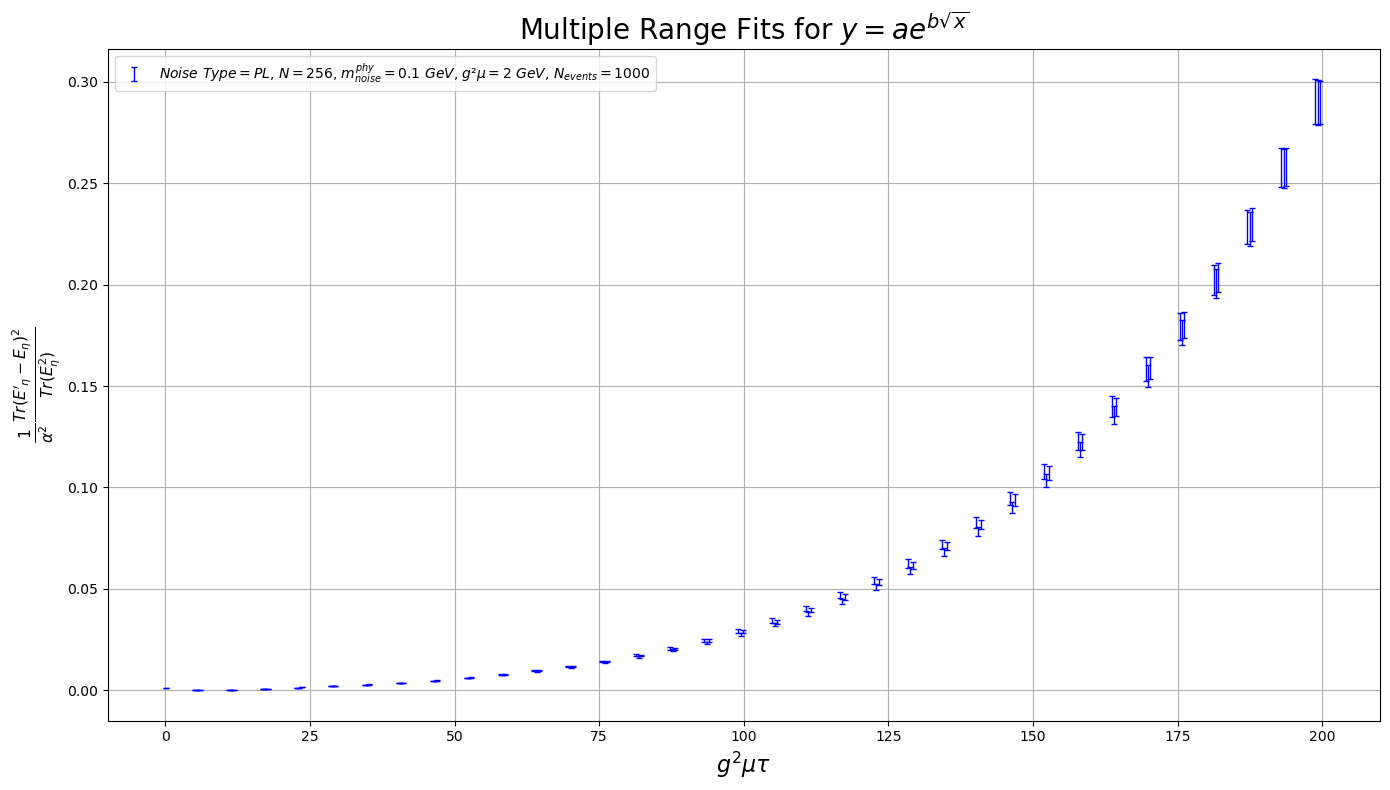

In [2]:
""" ========================================== 03 June 2025 ========================================== """
# Curve fitting in provided x-ranges for a combined alpha file"""


# ++++++++++++++++++++++++++++++++++ Initializing the base path for saving the plots ++++++++++++++++++++++++++++++++++ #
base_path = "/home/pooja/Desktop/Research/curraun/Plotting/Plotting_20052025_allalpha/"         # Base directory for saving the plots

# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} (for saving the combined plot) exists.\nGo ahead and start plotting :) :) \n\n")
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #




# +++++++++++++++++++++++++++++++++++++++++++++ Define Exponential Function +++++++++++++++++++++++++++++++++++++++++++++ #
def exponential_fit_customized(x, a, b):
    x = np.sqrt(x)
    y = a * np.exp(b * x)
    return y
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #


# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# Define the ranges to test
x_min = np.arange(5, 101, 5)                                # [5, 10, ..., 95, 100]
x_max = np.arange(30, 301, 5)                               # [50, 55, ..., 300]


#x_min = np.arange(5, 106, 5 )                                # [5, 10, ..., 95, 100]
#x_max = np.arange(30, 401, 5)

print("\nPossible values of minimum x, x_min:\n", x_min)
print("\nPossible values of maximum x, x_max:\n", x_max)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #


# Create a table to store results
results_table = []

# ================================================ Plotting and Fitting ================================================ #
plt.figure(figsize=(14, 8))



for noise_type in noise_type_list:
        for N in N_list:
            for mnoise in mnoise_list:

                noise_type_str = noise_type
                mnoise_str = f"{mnoise:.1f}" 
                   
                #print("mnoise_str:", mnoise_str)
                #print("noise_type_str:", noise_type_str)

                filename = f"data_combinedAlpha_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_g2mu{g2mu}_m{mnoise_str}_Nevents{N_events}.csv"   # Dynamically generate file names
                filename_with_path = os.path.join(base_path, filename)


                print("\nFile name,  filename:                                     ", filename)
                print("File name with its full path,  filename_with_path:        ", filename_with_path)
                   
                # Check if the file exists
                if not os.path.exists(filename_with_path):
                    print(f"File {filename_with_path} does not exist. \nSkipping this file ...")
                    continue

                df1 = pd.read_csv(filename_with_path)
                x_data = df1["tau"]
                y_data = df1["diff_Eetaalpha2"]
                y_error = df1["diff_Eetaalpha2_error"]  

                #plot_label = rf"$Noise~Type = {noise_type}$, $N = {N}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$, $N_{{events}} = {N_events}$"
                plot_label = rf"$Noise~Type = {noise_type}$, $N = {N}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ GeV$, $g²\mu = {g2mu}~ GeV$, $N_{{events}} = {N_events}$"
               
                plt.errorbar(x_data, y_data, y_error, label=plot_label,
                                errorevery=100,
                                linestyle='none',                                        # none: No connecting lines
                                color="red", 
                                ecolor='blue',
                                elinewidth=1,
                                capsize=2,
                            )




                # ******************************************** Fitting for limited data ******************************************** #
                # ****************************************************************************************************************** #

               # Test all range combinations
                for x_min_fit in x_min:
                    for x_max_fit in x_max:

                        if x_min_fit >= x_max_fit:              # Skip invalid ranges
                            continue
                                
                        # Filter data in current range using mask 
                        mask = (x_data >= x_min_fit) & (x_data <= x_max_fit)                            
                        x_fit = x_data[mask]
                        y_fit = y_data[mask]
                        y_error_fit = y_error[mask]


                        #print("x_fit: \n", x_fit)
                        #print("y_fit: \n", y_fit)
                        #print("y_error_fit: \n", y_error_fit)


                        sigma = y_error_fit
                        p0 = [0.0004, 0.01]  

                                                        # Perform the fit on the filtered data
                        fitted_parameters, covariance_matrix = curve_fit(exponential_fit_customized, x_fit, y_fit, p0=p0, maxfev=50000, sigma=sigma, absolute_sigma=True)
                        a, b = fitted_parameters                                                            # Get optimal parameters for fitting
                        a_error, b_error = np.sqrt(np.diag(covariance_matrix))                              # Standard errors for parameters a and b


                        # Generate points for the fitted curve (only in the fitting range)
                        x_fit_curve = x_fit             
                        y_fit_curve = exponential_fit_customized(x_fit_curve, a, b)

                        residuals = y_fit - y_fit_curve                                 # Calculate residuals (actual_data - fitted_data)

                        chi_sq = np.sum((residuals / sigma) ** 2)                       # Compute χ²

                        # Compute reduced χ²
                        N_data_points = len(x_fit_curve)
                        N_parameters = 2                                             # 2 = No. of parameters (a,b)
                        dof = N_data_points - N_parameters    
                        reduced_chi_sq = chi_sq / dof
                                
                        # Calculate chi-squared
                        residuals = y_fit - exponential_fit_customized(x_fit, a, b)
                        chi_sq = np.sum((residuals/sigma)**2)
                        dof = len(x_fit) - 2
                        reduced_chi_sq = chi_sq/dof

                        # Add new column for the criterion
                        range_x_sqrt = 0.4*(np.sqrt(x_max_fit) - np.sqrt(x_min_fit))



                                
                        # Store results
                        results_table.append({  'x_min': x_min_fit,
                                                'x_max': x_max_fit,
                                                'a': a,
                                                'a_error': a_error,
                                                'b': b,
                                                'b_error': b_error,
                                                'chi_sq': chi_sq,
                                                'reduced_chi_sq': reduced_chi_sq,
                                                'range_x_sqrt': range_x_sqrt })
                            
                                
                                # Plot the fitted curve (only in fitting range)

                        #Fit_label = rf"Fit: $y = {a:.5f}e^{{{b:.5f}\sqrt{{g^2 \mu \tau}}}}$  ($\chi^2$/dof$={reduced_chi_sq:.5f}$), $g^2 \mu \tau \in [{x_min_fit}, {x_max_fit}]$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$"
                        #Fit_label = (rf"Fit($x \in [{x_min_fit}, {x_max_fit}]$): " rf"$y = {a:.5f}e^{{{b:.5f}\sqrt{{x}}}}$" + "   " + rf"$\chi^2/\mathrm{{dof}} = {reduced_chi_sq:.5f}$" + "\n" + rf"$Noise~Type = {noise_type}$, $N = {N}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$, $N_{{events}} = {N_events}$")
      
                        Fit_label = (rf"Fit($x \in [{x_min_fit}, {x_max_fit}]$): " rf"$y = {a:.5f}e^{{{b:.5f}\sqrt{{x}}}}$" + "   " + rf"$\chi^2/\mathrm{{dof}} = {reduced_chi_sq:.5f}$" + "  " + rf"$Noise~Type = {noise_type}$, $N = {N}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ GeV$, $g²\mu = {g2mu}~ GeV$, $N_{{events}} = {N_events}$")
                                



                        #plt.plot(x_fit_curve, y_fit_curve, label=Fit_label,  linewidth=1, color='green')
                        #plt.scatter(x_fit_curve, y_fit_curve, label=Fit_label)

                        #print("\n\n\nfitted results")
                        #print("\n\nx_fit_curve:\n", x_fit_curve)
                        #print("\n\ny_fit_curve: \n", y_fit_curve)


                    # ****************************************************************************************************************** #
                    # ****************************************************************************************************************** #


plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
plt.ylabel(r"$\frac{1}{\alpha^2} \frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)}$", fontsize=16)
plt.title(r"Multiple Range Fits for $y = a e^{b\sqrt{x}}$", fontsize=20)

#plt.xlim(0, 300)
#plt.ylim(0, 0.07)

plt.legend()
plt.grid(True)
plt.tight_layout()




# Create and display results table
results_df = pd.DataFrame(results_table)
columns_order = ["x_min", "x_max", "a", "a_error", "b", "b_error", "chi_sq", "reduced_chi_sq", "b_error", "range_x_sqrt"]

Fit_results_filename = f"Data_fits_Noise{noise_type_str}_N{N}_g2mu{g2mu}_m{mnoise_str}_Nevents{N_events}" 

#results_df.to_csv(f"{Fit_results_filename}.csv", index = False, header = True, float_format="%.6e")                   

formatted_output = results_df.to_string(   index=False,  justify='center',  col_space=15  )#,  float_format="%.4e"   )
with open(f"{Fit_results_filename}.txt", "w") as f:
    f.write(formatted_output)


print("\n\nResults Table: \n")
#print(results_df[columns_order].to_string(index=False,  justify='center', float_format="{:,.4e}".format))

Plot_combinedAlpha_filename = f"Plot_combinedAlpha_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}.png" 
#plt.savefig(Plot_combinedAlpha_filename, dpi=300, bbox_inches='tight')
plt.show()

In [3]:
""" ========================================== 03 June 2025 ========================================== """


#  Keep only statistically acceptable fits for which χ² < 1.0
acceptable_fits_ChiSq = results_df[results_df["reduced_chi_sq"] < 1.0].copy()

print("Acceptable fits for which χ² < 1.0 : \n")
print(acceptable_fits_ChiSq[columns_order].to_string(index=False,  justify='center'))#, float_format="{:,.4e}".format))    

if acceptable_fits_ChiSq.empty:
    print("No fits have reduced χ² < 1.0 !!! \nThink what to do now :( \nNext cell will give error now.")
else:

    # Sort acceptable fits by b_error in ascending order
    best_fits = (acceptable_fits_ChiSq.sort_values(["b_error"]))
    print("\n\nSorting of acceptable fits for which χ² < 1.0 in order of ascending b_error: \n")
    print(best_fits[columns_order].to_string(index=False,  justify='center'))#, float_format="{:,.4e}".format)) 


    # write a separate file with name "Best_fits_Noise....."
    Best_fits_csv_filename = f"Data_fits_best_Noise{noise_type_str}_N{N}_g2mu{g2mu}_m{mnoise_str}_Nevents{N_events}" 
    
    #best_fits.to_csv(f"{Best_fits_csv_filename}.csv", index = False, header = True, float_format="%.7e")         # Save to a csv file          

    # Save to a text file
    formatted_output = best_fits.to_string(   index=False,  justify='center',  col_space=15)#,  float_format="%.4e"   )
    with open(f"{Best_fits_csv_filename}.txt", "w") as f:
        f.write(formatted_output)



    # =========================================== Best of Best Fits =========================================== #
    # Select best fits based on the new criterion: range_x_sqrt = 0.4*(√x_max - √x_min) ≥ some_number

    some_number = 1.5
    
    bestof_bestfits = best_fits[best_fits["range_x_sqrt"] >= some_number].copy()  # Filter based on the new criterion
    
    print("\n\nBest of best fits (χ² < 1.0, sorted by b_error, and 0.4*(√x_max-√x_min) ≥ some_number): \n")
    print(bestof_bestfits[columns_order].to_string(index=False, justify='center'))

    if bestof_bestfits.empty:
        print("\nNo fits satisfy all criteria (χ² < 1.0 AND 0.4*(√x_max-√x_min) ≥ 1.5)!")
        print("Using the best fit from χ² < 1.0 sorted by b_error instead.")
        bestof_bestfits = best_fits.head(1)  # Take the top one if none satisfy the sqrt criterion
    else:

        # Sort first by b_error (ascending), then by range_x_sqrt (descending)
        bestof_bestfits = bestof_bestfits.sort_values(['b_error', 'range_x_sqrt'], ascending=[True, False])
               
        #bestof_bestfits = bestof_bestfits.sort_values('b_error')
        #bestof_bestfits = bestof_bestfits.sort_values('b_error').head(1)   # If multiple fits satisfy, take the one with smallest b_error 

    
        

    # Write the best of best fits to a file
    Best_of_bestfits_csv_filename = f"Data_fits_bestofbest_Noise{noise_type_str}_N{N}_g2mu{g2mu}_m{mnoise_str}_Nevents{N_events}" 

    formatted_output = bestof_bestfits.to_string(index=False, justify='center', col_space=15)
    with open(f"{Best_of_bestfits_csv_filename}.txt", "w") as f:
        f.write(formatted_output)

Acceptable fits for which χ² < 1.0 : 

 x_min  x_max     a       a_error       b     b_error    chi_sq    reduced_chi_sq  b_error  range_x_sqrt
  35    200   0.000100 1.113084e-07 0.565599 0.000115 8297.622643     0.984180    0.000115    3.290422  
  35    205   0.000100 1.113084e-07 0.565599 0.000115 8297.622643     0.984180    0.000115    3.360697  
  35    210   0.000100 1.113084e-07 0.565599 0.000115 8297.622643     0.984180    0.000115    3.430119  
  35    215   0.000100 1.113084e-07 0.565599 0.000115 8297.622643     0.984180    0.000115    3.498719  
  35    220   0.000100 1.113084e-07 0.565599 0.000115 8297.622643     0.984180    0.000115    3.566527  
  35    225   0.000100 1.113084e-07 0.565599 0.000115 8297.622643     0.984180    0.000115    3.633568  
  35    230   0.000100 1.113084e-07 0.565599 0.000115 8297.622643     0.984180    0.000115    3.699868  
  35    235   0.000100 1.113084e-07 0.565599 0.000115 8297.622643     0.984180    0.000115    3.765452  
  35    240   0.

Base path /home/pooja/Desktop/Research/curraun/Plotting/Plotting_20052025_allalpha/ (for saving the combined plot) exists.
Go ahead and start plotting :) :) 



File name,  filename:                                      data_combinedAlpha_tau_diffEetaalpha2_NoisePL_N256_g2mu2_m0.1_Nevents1000.csv
File name with its full path,  filename_with_path:         /home/pooja/Desktop/Research/curraun/Plotting/Plotting_20052025_allalpha/data_combinedAlpha_tau_diffEetaalpha2_NoisePL_N256_g2mu2_m0.1_Nevents1000.csv


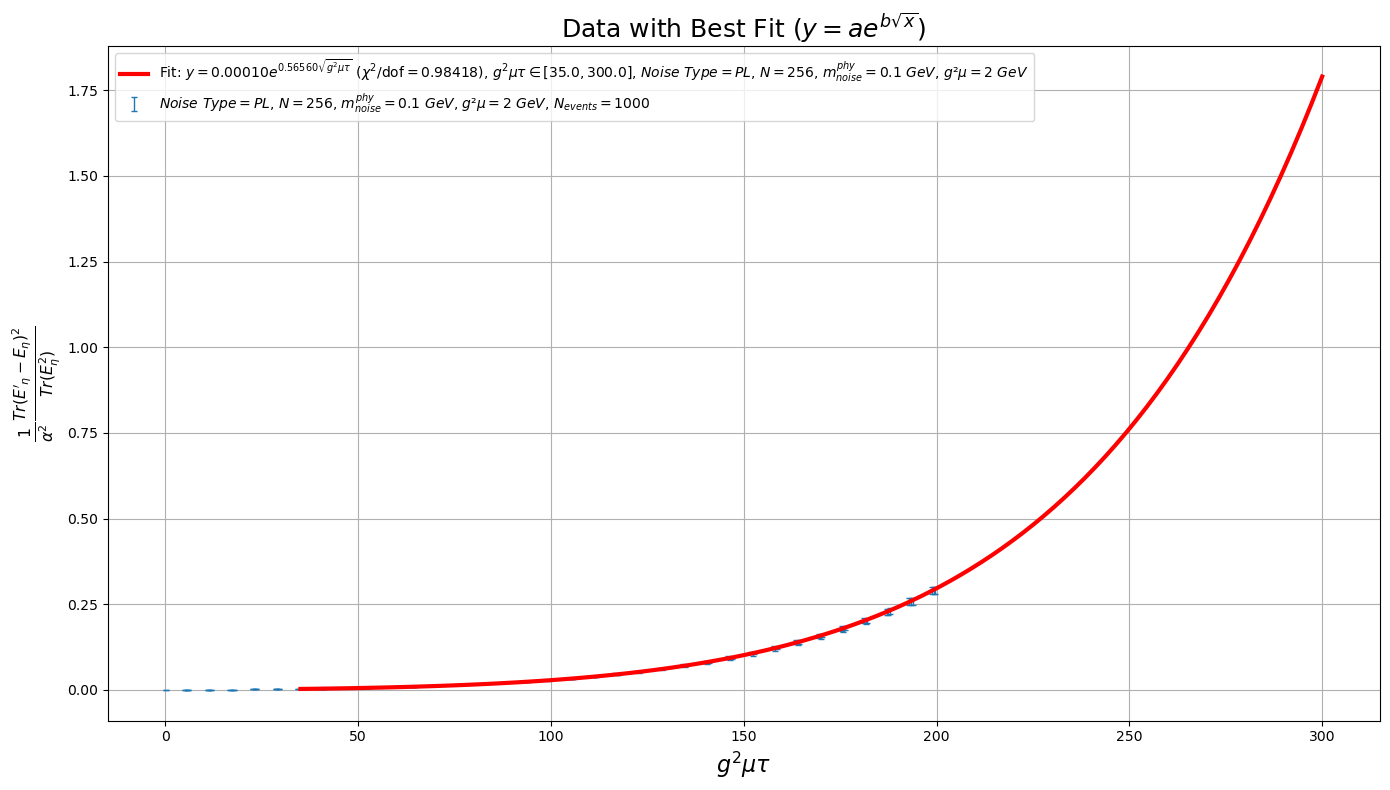

In [4]:
""" ========================================== 03 June 2025 ========================================== """



# Curve fitting in provided x-ranges for a combined alpha file"""


# ++++++++++++++++++++++++++++++++++ Initializing the base path for saving the plots ++++++++++++++++++++++++++++++++++ #
base_path = "/home/pooja/Desktop/Research/curraun/Plotting/Plotting_20052025_allalpha/"         # Base directory for saving the plots

# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} (for saving the combined plot) exists.\nGo ahead and start plotting :) :) \n\n")
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #


# Define a color cycle for different parameter sets
colors = plt.cm.tab20.colors                            # Using matplotlib's default color cycle
color_index = 0
#print("colors :\n", colors)

# Custom styling parameters
Line_style_Original = '--'           # Dashed line for original data
Line_width_Original = 2             # Line width for original data
Line_style_Fit = '-'               #  Solid line for best fit
Line_width_Fit = 3                  # Thicker line for best fit
Error_every = 100                   # Show error bars every N points


plt.figure(figsize=(14, 8))

for noise_type in noise_type_list:
        for N in N_list:
            for mnoise in mnoise_list:

                noise_type_str = noise_type
                mnoise_str = f"{mnoise:.1f}" 
                   
                #print("mnoise_str:", mnoise_str)
                #print("noise_type_str:", noise_type_str)


                filename = f"data_combinedAlpha_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_g2mu{g2mu}_m{mnoise_str}_Nevents{N_events}.csv"   # Dynamically generate file names
                filename_with_path = os.path.join(base_path, filename)
                    
                print("\nFile name,  filename:                                     ", filename)
                print("File name with its full path,  filename_with_path:        ", filename_with_path)
                   
                # Check if the file exists
                if not os.path.exists(filename_with_path):
                    print(f"File {filename_with_path} does not exist. \nSkipping this file ...")
                    continue

                df1 = pd.read_csv(filename_with_path)
                x_data = df1["tau"]
                y_data = df1["diff_Eetaalpha2"]
                y_error = df1["diff_Eetaalpha2_error"]  


                # Get color for this parameter set
                current_color = colors[color_index % len(colors)]
                color_index += 1

                #plot_label = rf"$Noise~Type = {noise_type}$, $N = {N}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$, $N_{{events}} = {N_events}$"
                plot_label = rf"$Noise~Type = {noise_type}$, $N = {N}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ GeV$, $g²\mu = {g2mu}~ GeV$, $N_{{events}} = {N_events}$"


                plt.errorbar(x_data, y_data, y_error, label=plot_label,
                                errorevery=100,
                                linestyle="none",                                        # 'none': No connecting lines
                                color=current_color, 
                                ecolor=current_color,
                                elinewidth=1,
                                capsize=2,
                            )

                #best_fit_row = best_fits.iloc[0]  # Takes the first row (best fit)       
                best_fit_row = bestof_bestfits.iloc[0]  # Takes the first row (best fit)  

                a = best_fit_row['a']
                b = best_fit_row['b']
                x_min_fit = best_fit_row['x_min']
                x_max_fit = best_fit_row['x_max']
                reduced_chi_sq = best_fit_row['reduced_chi_sq']


                    # Generate points for the best fit curve
                x_fit = np.linspace(x_min_fit, x_max_fit, 100)
                y_fit = exponential_fit_customized(x_fit, a, b)

                #print("\n\nBest_fits: \n", best_fits)
                #print("\n\nbest_fit_row: \n", best_fit_row)

                # Plot the best fit curve with same color but different style
                #Fit_label = rf"Fit: $y = {a:.5f}e^{{{b:.5f}\sqrt{{g^2 \mu \tau}}}}$ ($\chi^2$/dof$={reduced_chi_sq:.5f}$), $g^2 \mu \tau \in [{x_min_fit}, {x_max_fit}]$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$"
                Fit_label = rf"Fit: $y = {a:.5f}e^{{{b:.5f}\sqrt{{g^2 \mu \tau}}}}$ ($\chi^2$/dof$={reduced_chi_sq:.5f}$), $g^2 \mu \tau \in [{x_min_fit}, {x_max_fit}]$, $Noise~Type = {noise_type}$, $N = {N}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ GeV$, $g²\mu = {g2mu}~ GeV$"                
                plt.plot(x_fit, y_fit, label=Fit_label, linestyle=Line_style_Fit, linewidth=Line_width_Fit, color="red")
                


plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
plt.ylabel(r"$\frac{1}{\alpha^2} \frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)}$", fontsize=16)
plt.title(r"Data with Best Fit ($y = a e^{b\sqrt{x}}$)", fontsize=18)



#plt.xlim(0.0, 300)                                                                                                    
#plt.ylim(0.0, 1)

# Adjust legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()




base_path = "/home/pooja/Desktop/Research/curraun/Plotting/Plotting_20052025_allalpha/Plots/"   
Plot_Best_fits_filename = f"Plot_best_fits_Noise{noise_type_str}_N{N}_m{mnoise_str}_g2mu{g2mu}_Nevents{N_events}.png" 
Plot_Best_fits_filename_with_path = os.path.join(base_path, Plot_Best_fits_filename)  # Full path for saving the plot

# Save the plot with high quality
plt.savefig(Plot_Best_fits_filename_with_path, dpi=300, bbox_inches='tight')
plt.show()